In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 215kB 5.8MB/s 
     |████████████████████████████████| 194kB 7.4MB/s 
     |████████████████████████████████| 8.2MB 8.2MB/s 
     |████████████████████████████████| 2.1MB 48.5MB/s 
     |████████████████████████████████| 3.3MB 56.5MB/s 
     |████████████████████████████████| 2.1MB 56.3MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
     |████████████████████████████████| 122kB 65.2MB/s 
     |████████████████████████████████| 1.2MB 50.2MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 112kB 59.1MB/s 
     |████████████████████████████████| 245kB 38.9MB/s 
     |████████████████████████████████| 163kB 56.9MB/s 
     |████████████████████████████████| 112kB 60.5MB/s 
     |████████████████████████████████| 4.2MB 52.1MB/s 
     |████████████████████████████████| 81kB 12.5MB/s 
     |████████████████████████████████| 901kB 54.8MB/s 
     |████████████████████████████████| 133kB 59.3MB/s 

In [ ]:
!pip install pyarabic

     |████████████████████████████████| 112kB 5.7MB/s 
  Created wheel for pyarabic: filename=PyArabic-0.6.10-cp37-none-any.whl size=113324 sha256=b5ffd266e8f1f0b3ad01fa993a1e890e098e251c5663d5109dca3288c7deb247
  Stored in directory: /root/.cache/pip/wheels/10/b8/f5/b7c1a50e6efb83544844f165a9b134afe7292585465e29b61d
Successfully built pyarabic


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os
from torchvision import transforms, utils
from PIL import Image
from torchvision.transforms import ToTensor
from torch.autograd import Variable
import torch
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import PIL 
from torch import nn
import torch.optim as optim

import warnings 
warnings.simplefilter('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/check-worthiness/processed_Arabic_train.csv")

In [ ]:
data

Unnamed: 0  ...                                       full_text_ar
0              0  ...  ثور ة لبنان ال يوم و ال عراق تتر و رعاع ايران ...
1              1  ...  #لبنان_النا_مش_الكن أرمل ة فقير ة عليهاإيقاف خ...
2              2  ...  #جدار_العار ال حو ت ال حيطان عمر وا ن و ال شعب...
3              3  ...  حمى #جدار_العار ال سلط ة ال سياسي ة ال فاسد ة ...
4              4  ...  موازن ة شو ؟ ارقام صحيح ة حكوم ة نال ال ثق ة ،...
...          ...  ...                                                ...
1495        1495  ...  برنامج ال  اتجاه ال  معاكس ال  ليل  ة انفجر ال...
1496        1496  ...  #الاتجاه_المعاكس حق #تركيا حمى أمن  ال  قومي ش...
1497        1497  ...  أهمي  ة جبل ال  زاوي  ة إدلب و  عنى  ه محاول  ...
1498        1498  ...  رأى ال  بلد تركيا و  روسيا منطق  ة ال  بحر ال ...
1499        1499  ...  ال  استاذ حمز  ة تك  ين اثلج صدور  نا اجوب  ت ...

[1500 rows x 5 columns]

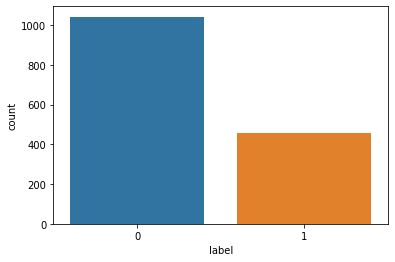

In [ ]:
sns.countplot(data=data,x="label")

In [ ]:
data.drop(["topicID","Unnamed: 0","tweetID"],axis=1,inplace=True)

In [ ]:
import re
from os import listdir
from os.path import isfile, join
from pyarabic import araby

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def process(text):
  text = araby.strip_tashkeel(text) #delete *tashkil

  text = re.sub('\ـ+', ' ', text)  # delete letter madda

  text = re.sub('\ر+', 'ر', text)  # duplicate ra2
  text = re.sub('\اا+','ا',text)     #duplicate alif
  text = re.sub('\ووو+','و',text)    #duplicate waw (more than 3 times goes to 1
  text = re.sub('\ههه+','ههه',text)  #duplicate ha2 (more than 3 times goes to 1
  text = re.sub('\ةة+','ة',text)
  text = re.sub('\ييي+','ي',text)
  text = re.sub('أ','ا',text) # after to avoid mixing
  text = re.sub('آ','ا',text) # after to avoid mixing
  text = re.sub('إ','ا',text) # after to avoid mixing
  text = re.sub('ة','ه',text) # after ةة to avoid mixing ههه
  text = re.sub('ى','ي',text)
  #text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]))"," ",text)
  text = deEmojify(text)
  text = " ".join(text.split()) #delete multispace
  return text
def remove_english(value):
    output = re.sub(r'\s*[A-Za-z]+\b', '' , value)
    results=re.sub(r'\W', ' ', output, flags=re.UNICODE)
    return results

In [ ]:
#data['full_text_ar']=data['full_text_ar'].apply(lambda x : process(x))

#AraBERTV01-Unmodified with simpletransformers

In [ ]:
from simpletransformers.classification import ClassificationModel

In [ ]:
def get_model(model_type, model_name, n_epochs = 2, train_batch_size = 32, eval_batch_size = 16, seq_len = 128, lr = 2e-4):
  model = ClassificationModel(model_type, model_name,num_labels=2, args={'train_batch_size':train_batch_size,
                                                                         "eval_batch_size": eval_batch_size,
                                                                         'reprocess_input_data': True,
                                                                         'overwrite_output_dir': True,
                                                                         'fp16': False,
                                                                         'do_lower_case': False,
                                                                         'num_train_epochs': n_epochs,
                                                                         'max_seq_length': seq_len,
                                                                         'manual_seed': 2,
                                                                         "learning_rate":lr,
                                                                         "save_eval_checkpoints": False,
                                                                         "save_model_every_epoch": False,})
  return model

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.1)

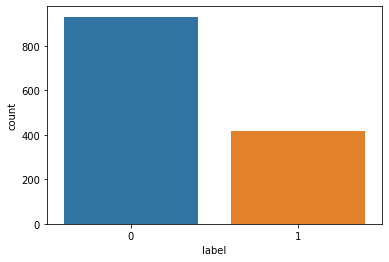

In [ ]:
sns.countplot(data=train,x="label")

In [ ]:
sns.countplot(data=test,x="label")

In [ ]:
tmp = pd.DataFrame()
tmp['text'] = train['full_text_ar']
tmp['labels'] = train['label']
tmp_test = test[['full_text_ar']].rename({'full_text_ar': 'text'}, axis=1)
tmp_test['labels'] = 0
tmp_trn, tmp_val = train_test_split(tmp, test_size=0.2, random_state=2)

In [ ]:
len(test)

150

In [ ]:
model = get_model('bert', 'aubmindlab/bert-base-arabertv01', n_epochs=10,lr=2e-5,train_batch_size=64)
model.train_model(tmp_trn)


Some weights of the model checkpoint at aubmindlab/bert-base-arabertv01 were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification wer

  0%|          | 0/1080 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/17 [00:00<?, ?it/s]

(170, 0.22627198244171107)

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
preds_val = model.eval_model(tmp_val,AP = average_precision_score)

  0%|          | 0/270 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
preds_val[0]

{'AP': 0.6242495126705653,
 'auprc': 0.8208492354760113,
 'auroc': 0.9061313076505697,
 'eval_loss': 0.4795777757159051,
 'fn': 20,
 'fp': 19,
 'mcc': 0.6414979964523645,
 'tn': 175,
 'tp': 56}

In [ ]:
test = pd.read_csv('/content/test_CTAR.csv')

In [ ]:
#test['text']=test['text'].apply(lambda x : process(x))

In [ ]:
y_pred,outp = model.predict(test['text'].tolist())

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

In [ ]:
sub = pd.DataFrame()
sub['tweetID'] = test.tweetID.copy()
sub['label'] = outp[:,1]
sub.to_csv('subSimpletransformers.csv',sep='\t',index=False,header=None)

In [ ]:
!python3 main.py --gold_file_path=new_test.csv --pred_file_path=subSimpletransformers.csv

INFO : Started evaluating results for Task 5 ...
INFO : Reading gold predictions from file new_test.csv
INFO : Reading predicted ranking order from file subSimpletransformers.csv
INFO : ======================================== RESULTS for subSimpletransformers.csv =========================================
INFO : AVERAGE PRECISION:            0.6306    
INFO : ========================================================================================================================
INFO : RECIPROCAL RANK:              1.0000    
INFO : ========================================================================================================================
INFO : R-PRECISION (R=1604):         0.6135    
INFO : ========================================================================================================================
INFO : PRECISION@N:                  @5        @10       @15       @20       @25       @30       
INFO :                               1.0000    0.9000    0.9333    